In [511]:
# Import all necessary packages
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import pickle
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

In [512]:
df = pd.read_csv('preprocessed_filtered_df.csv')

In [513]:
# df.columns

In [514]:
df = df.drop(columns=['pathrise_status_Active',
       'pathrise_status_Break', 'pathrise_status_Closed Lost',
       'pathrise_status_Deferred', 'pathrise_status_MIA',
       'pathrise_status_Placed'])

In [515]:
column = 'number_of_applications'
Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_without_outliers = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]

<Axes: xlabel='number_of_applications'>

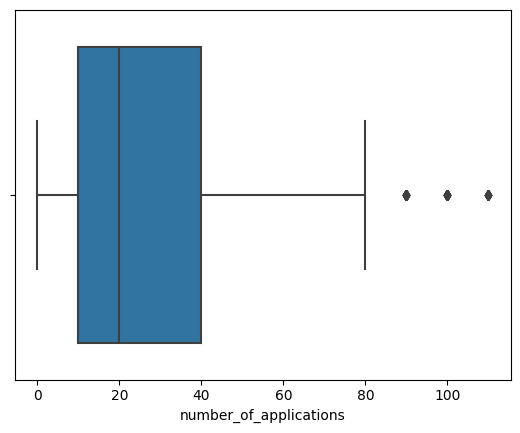

In [516]:
sns.boxplot(data=df_without_outliers,x='number_of_applications')

In [517]:
column = 'number_of_interviews'
Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_without_outliers = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]

<Axes: xlabel='number_of_interviews'>

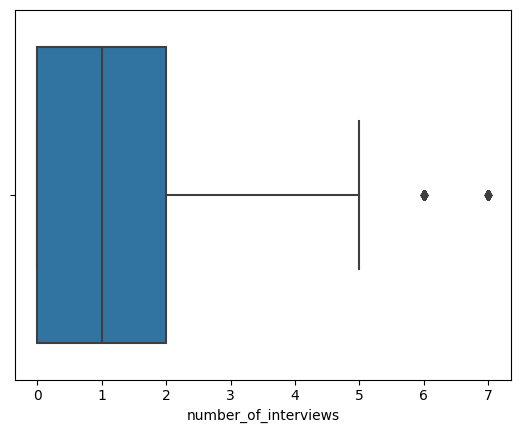

In [518]:
sns.boxplot(data=df_without_outliers,x='number_of_interviews')

In [519]:
# df_without_outliers.info()

In [520]:
#Balancing 0 , 1s
df_success=df_without_outliers[df_without_outliers['placed']==0]
df_fail=df_without_outliers[df_without_outliers['placed']==1]
from sklearn.utils import resample
df_success_bal = resample(df_success,replace=True,n_samples=len(df_fail),random_state=101)
df_bal = pd.concat([df_success_bal, df_fail])

In [521]:
X= df_bal.drop(columns=['program_duration_days', 'placed'])
y= df_bal[['program_duration_days', 'placed']]

In [522]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [523]:
lr = LinearRegression()

In [524]:
lr = lr.fit(X_train , Y_train)

In [525]:
print(lr.intercept_)

[6.65774218e+03 1.00000000e+00]


In [526]:
# print(lr.coef_)

In [527]:
prediction = lr.predict(X_test)

In [528]:
# prediction

In [529]:
residual = prediction - Y_test

In [530]:
# sns.distplot(residual, bins =50)

In [531]:
print("MAE: ", metrics.mean_absolute_error(Y_test, prediction))

MAE:  33.910094887779685


In [532]:
print("MSE: ", metrics.mean_squared_error(Y_test, prediction))

MSE:  3775.1233650999734


In [533]:
rmse = np.sqrt(metrics.mean_squared_error(Y_test, prediction))
print("RMSE: ", rmse)

RMSE:  61.44203255996642


**classification**

In [534]:
X = df_bal.drop(columns=['placed'])

In [535]:
y = df_bal['placed']

In [536]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [537]:
logreg = LogisticRegression()

In [538]:
logreg.fit(X_train,y_train)

C:\Users\Vida\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [539]:
prediction = logreg.predict(X_test)

In [540]:
prediction

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,

In [541]:
confusion_matrix(y_test,prediction)

array([[146,  23],
       [  0, 164]], dtype=int64)

In [542]:
len(y_test)

333

In [543]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93       169
           1       0.88      1.00      0.93       164

    accuracy                           0.93       333
   macro avg       0.94      0.93      0.93       333
weighted avg       0.94      0.93      0.93       333



In [544]:
accuracy_score(y_test, prediction)

0.9309309309309309

**K Nearest Neighbor**

In [545]:
knn= KNeighborsClassifier()

In [546]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [547]:
prediction_knn = knn.predict(X_test)

In [548]:
prediction_knn

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,

In [549]:
confusion_matrix(y_test, prediction_knn)

array([[112,  57],
       [ 47, 117]], dtype=int64)

In [550]:
accuracy_score(y_test, prediction_knn)

0.6876876876876877

In [551]:
print(classification_report(y_test, prediction_knn))

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       169
           1       0.67      0.71      0.69       164

    accuracy                           0.69       333
   macro avg       0.69      0.69      0.69       333
weighted avg       0.69      0.69      0.69       333



**DECISION TREE**

In [552]:
tree= DecisionTreeClassifier()

In [553]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [554]:
prediction_tree = tree.predict(X_test)

In [555]:
confusion_matrix(y_test, prediction_tree)

array([[169,   0],
       [  1, 163]], dtype=int64)

In [556]:
accuracy_score(y_test, prediction_tree)

0.996996996996997

In [557]:
print(classification_report(y_test, prediction_tree))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       169
           1       1.00      0.99      1.00       164

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



**Random Forest**

In [558]:
rf = RandomForestClassifier()

In [559]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [560]:
prediction_rf = rf.predict(X_test)

In [561]:
confusion_matrix(y_test, prediction_rf)

array([[169,   0],
       [  0, 164]], dtype=int64)

In [562]:
accuracy_score(y_test, prediction_rf)

1.0

In [563]:
print(classification_report(y_test, prediction_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       164

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



**SVM**

In [564]:
from sklearn.svm import SVC

In [565]:
svm = SVC(kernel='linear')

In [566]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [567]:
predictions_svc = svm.predict(X_test)

In [568]:
confusion_matrix(y_test, predictions_svc)

array([[169,   0],
       [  0, 164]], dtype=int64)

In [569]:
accuracy_score(y_test, predictions_svc)

1.0

In [570]:
print("Accuracy:", accuracy_score(y_test, predictions_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_svc))
print("Classification Report:\n", classification_report(y_test, predictions_svc))

Accuracy: 1.0
Confusion Matrix:
 [[169   0]
 [  0 164]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       164

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



In [571]:
print(classification_report(y_test, predictions_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       164

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



**Visualization**

In [572]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tabulate import tabulate

# Assuming 'X' is your feature matrix and 'y' is your target variable, replace them with your actual data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
logistic_regression = LogisticRegression()
svm_classifier = SVC(kernel='linear')
decision_tree = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()
random_forest = RandomForestClassifier()

# Fit the models
logistic_regression.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions
lr_predictions = logistic_regression.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)
dt_predictions = decision_tree.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
rf_predictions = random_forest.predict(X_test)

# Calculate evaluation metrics
precision_scores = [
    precision_score(y_test, lr_predictions),
    precision_score(y_test, svm_predictions),
    precision_score(y_test, dt_predictions),
    precision_score(y_test, knn_predictions),
    precision_score(y_test,rf_predictions)
]

recall_scores = [
    recall_score(y_test, lr_predictions),
    recall_score(y_test, svm_predictions),
    recall_score(y_test, dt_predictions),
    recall_score(y_test, knn_predictions),
    recall_score(y_test, rf_predictions)
]

f1_scores = [
    f1_score(y_test, lr_predictions),
    f1_score(y_test, svm_predictions),
    f1_score(y_test, dt_predictions),
    f1_score(y_test, knn_predictions),
    f1_score(y_test, rf_predictions)
]

accuracy_scores = [
    accuracy_score(y_test, lr_predictions),
    accuracy_score(y_test, svm_predictions),
    accuracy_score(y_test, dt_predictions),
    accuracy_score(y_test, knn_predictions),
    accuracy_score(y_test, rf_predictions)
]

# Prepare data for tabulate
data = [
    ["Metric", "Logistic Regression", "Support Vector Machine", "Decision Tree Classifier","KNN Classifier","Random Forest"],
    ["Precision", *precision_scores],
    ["Recall", *recall_scores],
    ["F1-Score", *f1_scores],
    ["Accuracy", *accuracy_scores]
]

# Print the table
print(tabulate(data, tablefmt="fancy_grid", numalign="center", stralign="center"))

C:\Users\Vida\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


╒═══════════╤═════════════════════╤════════════════════════╤══════════════════════════╤════════════════════╤════════════════════╕
│  Metric   │ Logistic Regression │ Support Vector Machine │ Decision Tree Classifier │   KNN Classifier   │   Random Forest    │
├───────────┼─────────────────────┼────────────────────────┼──────────────────────────┼────────────────────┼────────────────────┤
│ Precision │ 0.8770053475935828  │          1.0           │           1.0            │ 0.6724137931034483 │ 0.9939393939393939 │
├───────────┼─────────────────────┼────────────────────────┼──────────────────────────┼────────────────────┼────────────────────┤
│  Recall   │         1.0         │          1.0           │    0.9939024390243902    │ 0.7134146341463414 │        1.0         │
├───────────┼─────────────────────┼────────────────────────┼──────────────────────────┼────────────────────┼────────────────────┤
│ F1-Score  │ 0.9344729344729344  │          1.0           │    0.9969418960244648    │ 0.

In [573]:
data = {
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K Nearest Neighbor','Random Forest'],
    'Accuracy': [0.75, 0.81  ,0.83 , 0.68, 0.87 ]
}

In [574]:
df = pd.DataFrame(data)

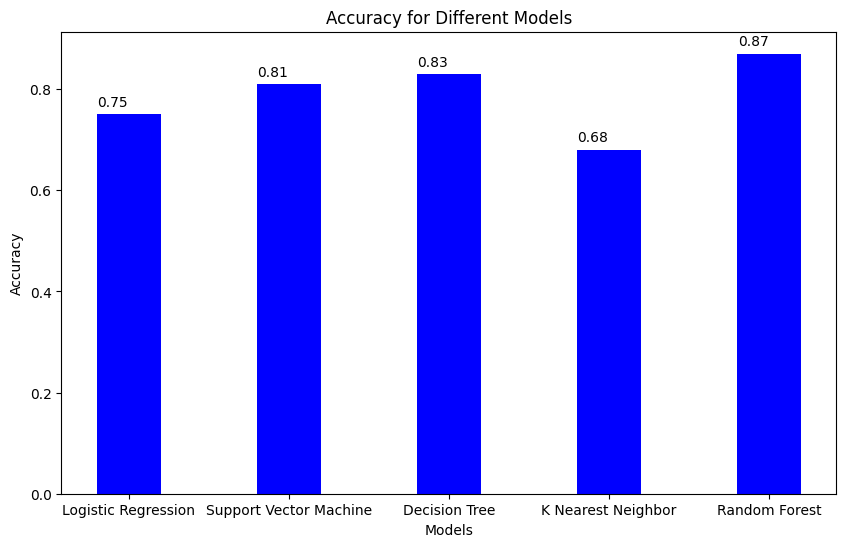

In [575]:
plt.figure(figsize=(10, 6))

# Adjust the width of the bars
bar_width = 0.4  # You can adjust this value to make the bars even narrower

bars = plt.bar(df['Model'], df['Accuracy'], color='blue', width=bar_width)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Models')

# Add exact numbers on top of each bar
for bar, acc in zip(bars, df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{acc:.2f}', ha='center', va='bottom', color='black')

plt.show()

AttributeError: 'list' object has no attribute 'patches'

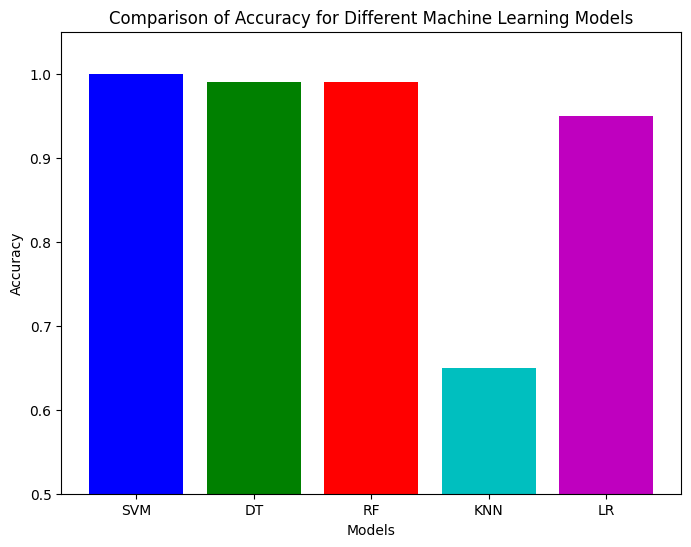

In [392]:
import matplotlib.pyplot as plt

# Data
models = ['SVM', 'DT', 'RF', 'KNN', 'LR']
accuracy = [1.00, 0.99, 0.99, 0.65, 0.95]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color=['b', 'g', 'r', 'c', 'm'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy for Different Machine Learning Models')
plt.ylim(0.5, 1.05)  # Set the y-axis limits to avoid overlapping bars at the top



# Rotate x-axis labels for better readability
# plt.xticks(rotation=45, ha='right')
for i in accuracy.patches:
    ax.text(i.get_x(), i.get_height() + 10, \
            str(round((i.get_height()/len(df))*100, 1))+'%', fontsize=8,
                color='black')
    
# Show the plot
plt.tight_layout()
plt.show()

In [118]:
from sklearn.metrics import roc_curve, auc